In [45]:
#importing libraries :
import pandas as pd 
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading train data
data=pd.read_csv('train.csv')
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
data.shape

(38932, 5)

In [5]:
data.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id24783,"We booked the bilevel suite. Unfortunately, it...",Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [8]:
# checking null values
print(data.isnull().sum())

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64


# EDA

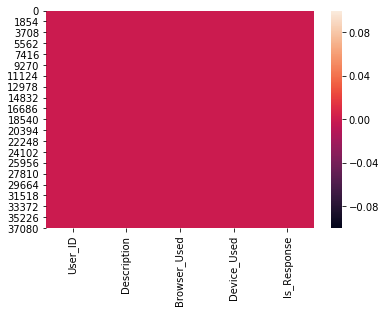

In [9]:
sns.heatmap(data.isnull())

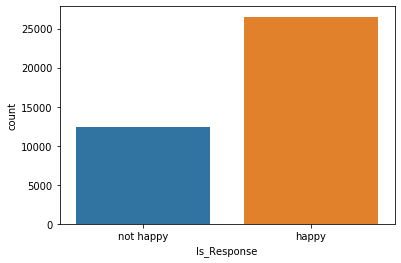

In [11]:
import seaborn as sns
sns.countplot(data['Is_Response'])

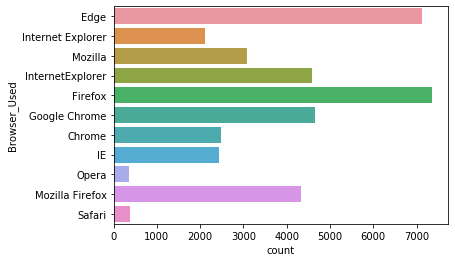

In [12]:
sns.countplot(y=data['Browser_Used'])

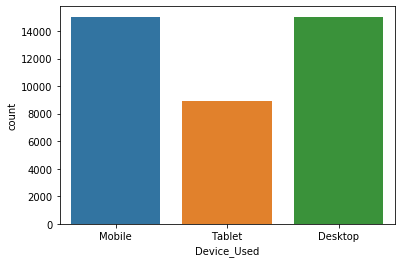

In [13]:
sns.countplot(x=data['Device_Used'])

In [14]:
## LABEL ENCODING THE FEATURES :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Is_Response']=le.fit_transform(data['Is_Response'])
data['Device_Used']=le.fit_transform(data['Device_Used'])
data['Browser_Used']=le.fit_transform(data['Browser_Used'])

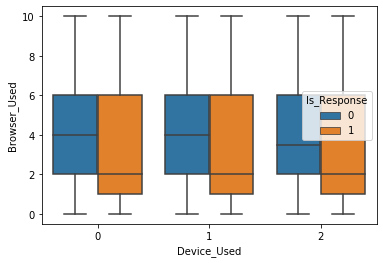

In [15]:
sns.boxplot(y=data['Browser_Used'],x=data['Device_Used'],hue=data['Is_Response'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C29ACF408>,
      dtype=object)

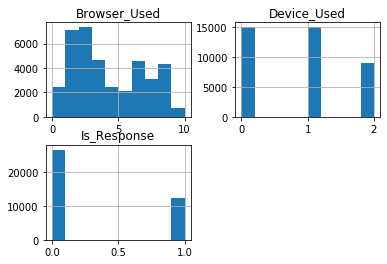

In [16]:
data.hist()

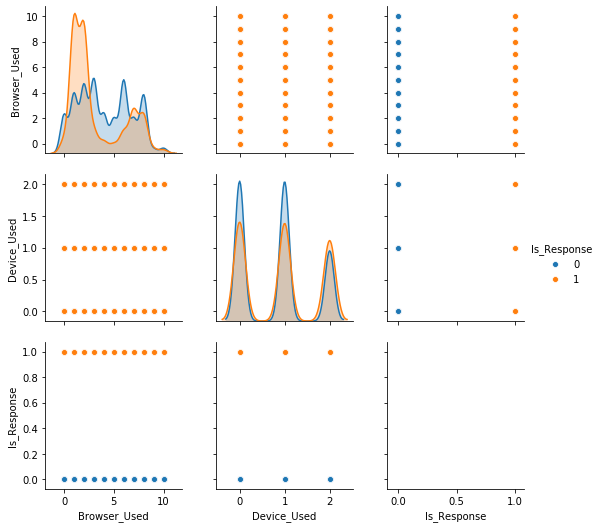

In [17]:
sns.pairplot(data,hue='Is_Response')

##   DATA CLEANING


In [20]:
# Lowering the text
data['Description']=data['Description'].str.lower()


In [21]:
# removinig punctuation
import string
data['Description'] = data['Description'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

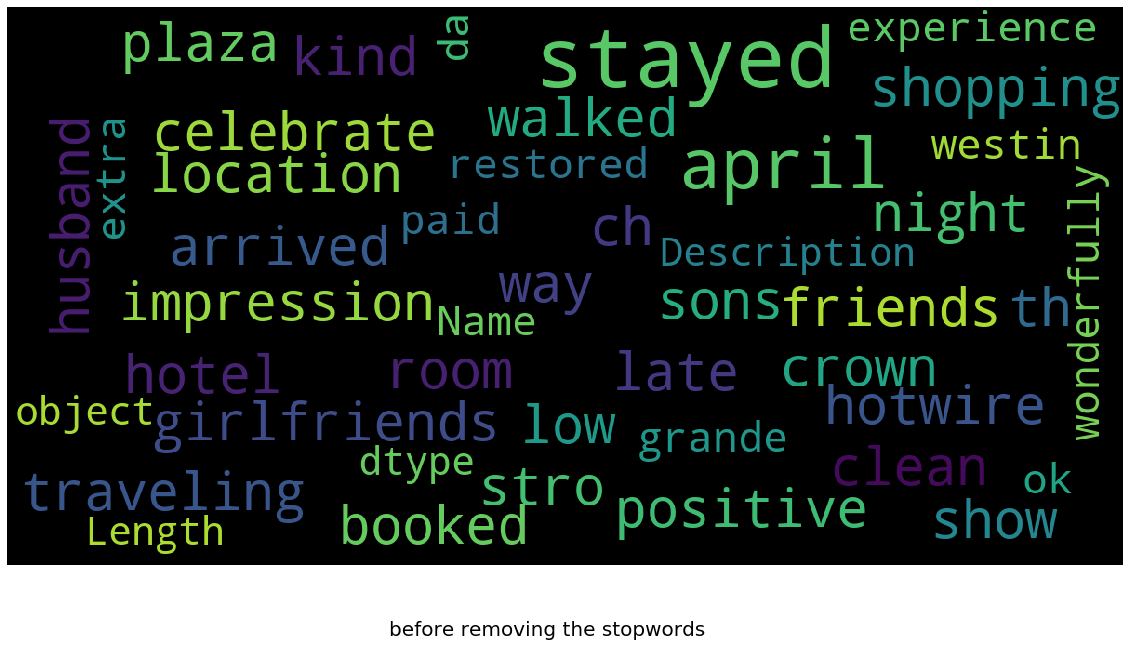

In [23]:
# WORD CLOUD 
# before removing the stopwords
def word_cloud(data, title = "before removing the stopwords"):
    word_cloud = WordCloud(
        background_color = 'black',
        max_words = 400,
        max_font_size = 30,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(word_cloud)
    plt.show()
word_cloud(data["Description"])

In [24]:
data['Description']

0        the room was kind of clean but had a very stro...
1        i stayed at the crown plaza april   april   th...
2        i booked this hotel through hotwire at the low...
3        stayed here with husband and sons on the way t...
4        my girlfriends and i stayed here to celebrate ...
                               ...                        
38927    we arrived late at night and walked in to a ch...
38928    the only positive impression is location and p...
38929    traveling with friends for shopping and a show...
38930    the experience was just ok we paid extra for a...
38931    the westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [25]:
#REMOVING STOPWORDS 
stop_words = stopwords.words('english')

In [26]:
data['Description'] = data['Description'].apply(lambda x:' '.join([i for i in x.split() 
                                                  if i not in stop_words]))

In [27]:
# DATA AFTER PERFORMING DATA CLEANING STEPS 
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,room kind clean strong smell dogs generally av...,1,1,1
1,id10327,stayed crown plaza april april staff friendly ...,5,1,1
2,id10328,booked hotel hotwire lowest price could find g...,7,2,1
3,id10329,stayed husband sons way alaska cruise loved ho...,6,0,0
4,id10330,girlfriends stayed celebrate th birthdays plan...,1,2,1


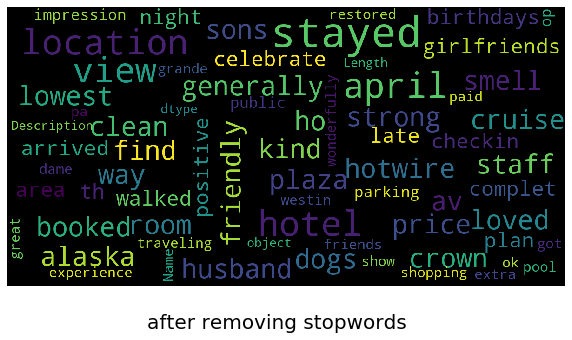

In [64]:
def word_cloud(data, title = "after removing stopwords"):
    word_cloud = WordCloud(
        background_color = 'black',
        max_words = 400,
        max_font_size = 30,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(word_cloud)
    plt.show()
word_cloud(data["Description"])

In [29]:
# REMOVING IRRELEVANT COLUMNS
data.drop('User_ID',inplace=True,axis=1)

In [30]:
data.head()

,Description,Browser_Used,Device_Used,Is_Response
0,room kind clean strong smell dogs generally av...,1,1,1
1,stayed crown plaza april april staff friendly ...,5,1,1
2,booked hotel hotwire lowest price could find g...,7,2,1
3,stayed husband sons way alaska cruise loved ho...,6,0,0
4,girlfriends stayed celebrate th birthdays plan...,1,2,1


# VECTORIZING  (using count vectorizer):

In [31]:
from sklearn.feature_extraction.text import CountVectorizer 
vect1 = CountVectorizer(max_features=20000)

In [32]:
x=vect1.fit_transform(data['Description']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
y=data['Is_Response'] # target variable
y

0        1
1        1
2        1
3        0
4        1
        ..
38927    0
38928    1
38929    1
38930    1
38931    0
Name: Is_Response, Length: 38932, dtype: int32

In [34]:
# splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

# random forest classifier :

In [35]:
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred = rfr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(confusion_matrix(y_test,pred))

0.7904109589041096
[[7614  373]
 [2075 1618]]


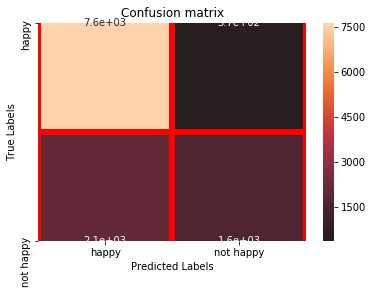

In [36]:
# plot confusion matrix heatmap
conf= confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()

In [37]:
# CROSS VALIDATION 
score = cross_val_score(rfr,x,y,cv =5)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Mean Score      :  79.71593028246214
STD score       :  0.0022554304762268506


# MULTINOMIAL NB

In [38]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred = mnb.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(confusion_matrix(y_test,pred))

0.8646404109589041
[[7314  673]
 [ 908 2785]]


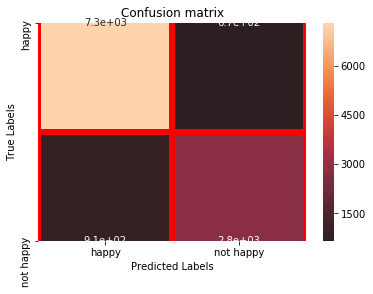

In [39]:
# plot confusion matrix heatmap
conf= confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()

In [40]:
score = cross_val_score(mnb,x,y,cv =5)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Mean Score      :  86.63567521598233
STD score       :  0.0008181583663350498


# LOGISTIC REGRESSION 

In [41]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(confusion_matrix(y_test,pred))

0.8636130136986301
[[7318  669]
 [ 924 2769]]


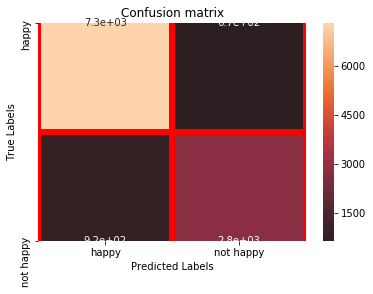

In [42]:
# plot confusion matrix heatmap
conf= confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()

In [43]:
score = cross_val_score(lg,x,y,cv =5)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Mean Score      :  86.45588443086778
STD score       :  0.002090433369515883


# ROC-AUC curve

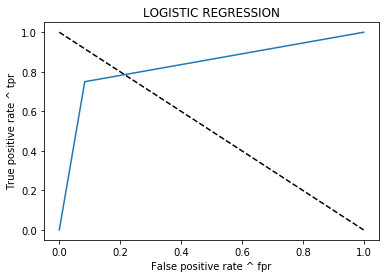

In [46]:
fpr,tpr,thresholds = roc_curve(y_test,pred)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'LOGISTIC REGRESSION')
plt.xlabel('False positive rate ^ fpr')
plt.ylabel('True positive rate ^ tpr')
plt.title('LOGISTIC REGRESSION')
plt.show()

# test data

In [47]:
data_test=pd.read_csv('test.csv')
data_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


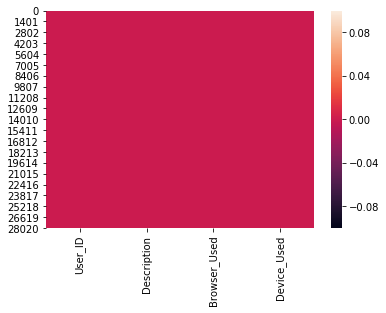

In [48]:
sns.heatmap(data_test.isnull())

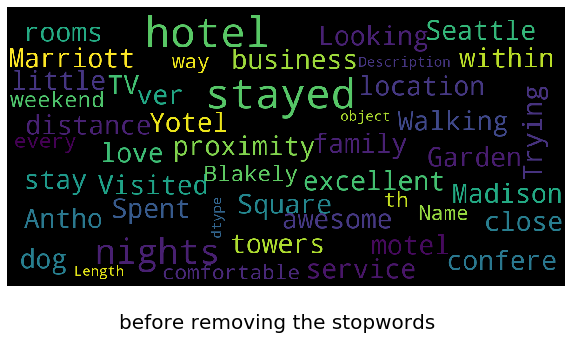

In [50]:
def word_cloud(data, title = "before removing the stopwords"):
    word_cloud = WordCloud(
        background_color = 'black',
        max_words = 400,
        max_font_size = 30,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(word_cloud)
    plt.show()
word_cloud(data_test["Description"])

# Data cleaning 

In [51]:
data_test['Description']=data_test['Description'].str.lower()
data_test['Description'] = data_test['Description'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
data_test['Description'] = data_test['Description'].apply(lambda x:' '.join([i for i in x.split() 
                                                  if i not in stop_words]))


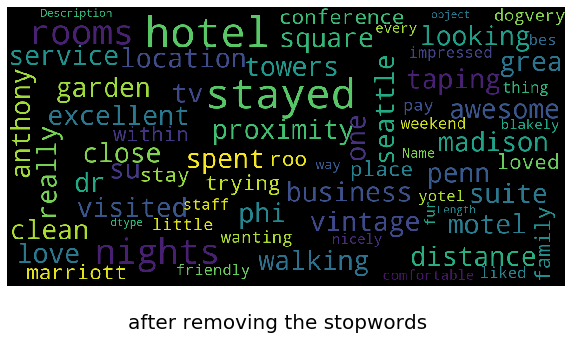

In [53]:
def word_cloud(data, title = "after removing the stopwords"):
    word_cloud = WordCloud(
        background_color = 'black',
        max_words = 400,
        max_font_size = 30,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(word_cloud)
    plt.show()
word_cloud(data_test["Description"])

In [54]:
data_test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,looking motel close proximity tv taping dr phi...,Firefox,Mobile
1,id80133,walking distance madison square garden penn su...,InternetExplorer,Desktop
2,id80134,visited seattle business spent nights vintage ...,IE,Tablet
3,id80135,hotel location excellent rooms clean suite one...,Edge,Mobile
4,id80136,hotel awesome love service anthony really grea...,Mozilla,Mobile


In [60]:
# vectorizing
vect2 = CountVectorizer(max_features=20000)
x=vect2.fit_transform(data_test['Description']).toarray()


# PREDICTION

In [61]:
# OVER MULTINOMIAL nb
pred_mnb = mnb.predict(x)
pred_mnb

array([1, 0, 1, ..., 1, 1, 1])

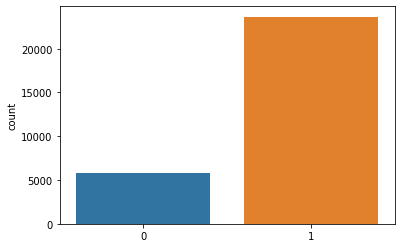

In [68]:
sns.countplot(pred_mnb)

In [63]:
# over LOGISTIC REGRESSION
pred_lg = lg.predict(x)
pred_lg

array([1, 0, 0, ..., 0, 0, 0])

In [71]:
# MULTINOMIAL NB AND LOGISTIC REGRESSION both are wroking good
# no underfitting and overfitting is observed
# mostly happy is the sentiment in the feedback /description